# GitterCom NLP Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk

plt.style.use('ggplot')

In [85]:
import warnings
warnings.filterwarnings("ignore") #toggle off warnings
#warnings.filterwarnings("default") #toggle on warnings

[Link to Dataset](https://figshare.com/s/9b3df36e22a8a8f77169?file=25610756) (*Also available on footnote 7 of the paper, page 2*)  
[Link to GitterCom Paper](https://par.nsf.gov/servlets/purl/10220039)

In [2]:
csv_file_path = 'GitterCom.csv'
df = pd.read_csv(csv_file_path)
df.shape

(11111, 9)

In [3]:
df.columns

Index(['Channel', 'messageId', 'time', 'user', 'message', 'Purpose',
       'Category', 'Subcategory', 'Unnamed: 8'],
      dtype='object')

In [4]:
df = df.dropna(subset=['message'])#11,111 messages goes to 9999, removing the NaN
df = df.reset_index(drop=True) #drop the old index numbers = true
df.shape

(9999, 9)

In [5]:
df.head()

,Channel,messageId,time,user,message,Purpose,Category,Subcategory,Unnamed: 8
0,Cucumber,5551fd48f853e7f14c2b7b3c,2015-05-12T13:16:56.794Z,amit007,"Hi Team, I just recently upgraded our cucumber...",Team Wide,Dev-Ops,Development Operation Notifications,NaN
1,Cucumber,5551fd4a00ed57993752bbb5,2015-05-12T13:16:58.574Z,amit007,Exception in thread \main\ java.lang.NoSuchMet...,Team Wide,Dev-Ops,Development Operation Notifications,NaN
2,Cucumber,5551feedf853e7f14c2b7b62,2015-05-12T13:23:57.768Z,aslakhellesoy,@amit007 looks like you have inconsistent cucu...,Team Wide,Communication,Communication with Teammates,NaN
3,Cucumber,5552032a1817239c37e4e01b,2015-05-12T13:42:02.416Z,LiohAu,So github is trying to replace irc :P,Team Wide,Communication,Communication with Teammates,NaN
4,Cucumber,55520e5900ed57993752be4e,2015-05-12T14:29:45.058Z,amit007,"@aslakhellesoy Thanks , seems like I was using...",Team Wide,Communication,Communication with Teammates,NaN


# EDA

In [6]:
#find the Communities (channel names)
query_string = 'Channel' + '.notnull()'
community_list = df.query(query_string)['Channel'].unique()
community_list = sorted(community_list) #alphabetical
for item in community_list:
    print(item)

Cucumber
Freezing Moon - Ancient Beast
ImageJ
JSPM
Jhipster
MarionetteJS
SciKit-Learn
TheHolyWaffle
UIKit
Xenko


In [7]:
#find the Purposes
query_string = 'Purpose' + '.notnull()'
community_list = df.query(query_string)['Purpose'].unique()
community_list = sorted(community_list) #alphabetical
for item in community_list:
    print(item)

Community support
Personal benefits
Team Wide


In [8]:
#find the Categories
query_string = 'Category' + '.notnull()'
community_list = df.query(query_string)['Category'].unique()
community_list = sorted(community_list) #alphabetical
for item in community_list:
    print(item)

Communication
Customer support
Dev-Ops
Dev-ops
Discovery and aggregate news and information
Fun
Networking and Social Activities
Networking and social activities
Participation in Communities of Practice
Team Collaboration
Team collaboration
communication
customer support


In [9]:
#find the Subcategories
query_string = 'Subcategory' + '.notnull()'
community_list = df.query(query_string)['Subcategory'].unique()
community_list = sorted(community_list) #alphabetical
for item in community_list:
    print(item)

Bouncing Ideas Off of Others in the Community
Bouncing Ideas off of Others in the Community
Bouncing Ideas off of others in the Community
Bouncing ideas off of others in the community
Bug
Code Sharing
Communication with Stakeholders
Communication with Teammates
Communication with teammates
Development Operation Notifications
Development operation Notifications
Development operation notifications
Documentation
Example
File and Code Sharing
File and Code Sharing 
File and code sharing
General
How-to
Jobs
Learning about new tools and frameworks for developing applications
Non-work Topics
Non-work topics
Reliably interesting/relevant blogs
Sharing gif or memes
Similar Interests
Similar interests
Software Deployments
Software deployments
Special Interest groups
Team Management
Team Q&A
Team Q&A 
Team management
Troubleshooting
Voting
Youtube Video
communication with Teammates
reliably interesting/relevant blogs


In [10]:
#get the text column, 1st entry
df['message'].values[0]

'Hi Team, I just recently upgraded our cucumber-jvm version ever since then I am getting following error '

# Basic NLTK

In [11]:
example = df['message'][0]
print(example)

Hi Team, I just recently upgraded our cucumber-jvm version ever since then I am getting following error 


In [12]:
#get first 20 tokens
tokens = nltk.word_tokenize(example)
tokens[:20]
#little smarter than just splitting on spaces

['Hi',
 'Team',
 ',',
 'I',
 'just',
 'recently',
 'upgraded',
 'our',
 'cucumber-jvm',
 'version',
 'ever',
 'since',
 'then',
 'I',
 'am',
 'getting',
 'following',
 'error']

### Find Part of speach for each of these words
[Link to abriviation explanation](https://www.guru99.com/pos-tagging-chunking-nltk.html)

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('Hi', 'NNP'),
 ('Team', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('recently', 'RB'),
 ('upgraded', 'VBD'),
 ('our', 'PRP$'),
 ('cucumber-jvm', 'JJ'),
 ('version', 'NN'),
 ('ever', 'RB'),
 ('since', 'IN'),
 ('then', 'RB'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('getting', 'VBG'),
 ('following', 'VBG'),
 ('error', 'NN')]

# VADER for sentiment analysis (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

#### take all the words in the sentence and assign positive, negative, or neutrality of sentence. 
#### Does not account for relationships of words
#### Stop words are removed
#### Each word is scored and combined to a total score (0-1 scores; compound is -1 to 1)

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progress bar tracker

sia = SentimentIntensityAnalyzer() 

In [15]:
#EX 
#compound is aggregate of other 3 from -1 to 1
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
print(example)

Hi Team, I just recently upgraded our cucumber-jvm version ever since then I am getting following error 


In [17]:
sia.polarity_scores(example)

{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4019}

### Run the polarity score on the entire dataset using a loop


In [18]:
df = df.reset_index().rename(columns={'index': 'Id'}) #reset and rename index so we can merge it onto original df
vaders = df

In [19]:
vaders

,Id,Channel,messageId,time,user,message,Purpose,Category,Subcategory,Unnamed: 8
0,0,Cucumber,5551fd48f853e7f14c2b7b3c,2015-05-12T13:16:56.794Z,amit007,"Hi Team, I just recently upgraded our cucumber...",Team Wide,Dev-Ops,Development Operation Notifications,NaN
1,1,Cucumber,5551fd4a00ed57993752bbb5,2015-05-12T13:16:58.574Z,amit007,Exception in thread \main\ java.lang.NoSuchMet...,Team Wide,Dev-Ops,Development Operation Notifications,NaN
2,2,Cucumber,5551feedf853e7f14c2b7b62,2015-05-12T13:23:57.768Z,aslakhellesoy,@amit007 looks like you have inconsistent cucu...,Team Wide,Communication,Communication with Teammates,NaN
3,3,Cucumber,5552032a1817239c37e4e01b,2015-05-12T13:42:02.416Z,LiohAu,So github is trying to replace irc :P,Team Wide,Communication,Communication with Teammates,NaN
4,4,Cucumber,55520e5900ed57993752be4e,2015-05-12T14:29:45.058Z,amit007,"@aslakhellesoy Thanks , seems like I was using...",Team Wide,Communication,Communication with Teammates,NaN
...,...,...,...,...,...,...,...,...,...,...
9994,9994,Xenko,5b6b73ed5ec2bc174fd172bd,2018-08-08T22:51:25.350Z,jayrulez,Hello @Kryptos-FR can you take a look here pl...,Team Wide,Team Collaboration,File and Code Sharing,NaN
9995,9995,Xenko,5b6b748b49932d4fe4b69a39,2018-08-08T22:54:03.199Z,jayrulez,I want to prevent this here:,Team Wide,Communication,Communication with teammates,NaN
9996,9996,Xenko,5b6b7491a6af14730b0c4fa0,2018-08-08T22:54:09.430Z,jayrulez,[![image.png](https://files.gitter.im/xenko3d/...,Team Wide,Team Collaboration,File and Code Sharing,NaN
9997,9997,Xenko,5b6b7583b983453ffbfc81f9,2018-08-08T22:58:11.414Z,Toriadus,"@Kryptos-FR Nice, that means someone is reall...",Team Wide,Communication,Communication with teammates,NaN


In [20]:
res = {}
for i, row in tqdm(vaders.iterrows(), total=len(df)):
    text = row['message']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/9999 [00:00<?, ?it/s]

In [21]:
#res is now a dict with scores, we now want a pd df
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.162,0.838,0.000,-0.4019
1,0.000,1.000,0.000,0.0000
2,0.000,0.762,0.238,0.3612
3,0.000,0.691,0.309,0.4824
4,0.000,0.769,0.231,0.6597
...,...,...,...,...
9994,0.000,0.777,0.223,0.3182
9995,0.000,0.556,0.444,0.1027
9996,0.000,1.000,0.000,0.0000
9997,0.000,0.781,0.219,0.4215


## Make the index a column for merging vaders and df, also rename columns for later comparison

In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'}) #reset and rename index so we can merge it onto original df
vaders = vaders.merge(df,how='left')
vaders = vaders.rename(columns={'neg':'VADER_neg','neu': 'VADER_neu','pos':'VADER_pos','compound':'VADER_compound'})
                                                                               

In [23]:
#now we have sentiment score and metadata
vaders.head()

,Id,VADER_neg,VADER_neu,VADER_pos,VADER_compound,Channel,messageId,time,user,message,Purpose,Category,Subcategory,Unnamed: 8
0,0,0.162,0.838,0.000,-0.4019,Cucumber,5551fd48f853e7f14c2b7b3c,2015-05-12T13:16:56.794Z,amit007,"Hi Team, I just recently upgraded our cucumber...",Team Wide,Dev-Ops,Development Operation Notifications,NaN
1,1,0.000,1.000,0.000,0.0000,Cucumber,5551fd4a00ed57993752bbb5,2015-05-12T13:16:58.574Z,amit007,Exception in thread \main\ java.lang.NoSuchMet...,Team Wide,Dev-Ops,Development Operation Notifications,NaN
2,2,0.000,0.762,0.238,0.3612,Cucumber,5551feedf853e7f14c2b7b62,2015-05-12T13:23:57.768Z,aslakhellesoy,@amit007 looks like you have inconsistent cucu...,Team Wide,Communication,Communication with Teammates,NaN
3,3,0.000,0.691,0.309,0.4824,Cucumber,5552032a1817239c37e4e01b,2015-05-12T13:42:02.416Z,LiohAu,So github is trying to replace irc :P,Team Wide,Communication,Communication with Teammates,NaN
4,4,0.000,0.769,0.231,0.6597,Cucumber,55520e5900ed57993752be4e,2015-05-12T14:29:45.058Z,amit007,"@aslakhellesoy Thanks , seems like I was using...",Team Wide,Communication,Communication with Teammates,NaN


In [ ]:
#note: try to plot cucumber compound vs other channel compound scores to see which channel are more +/-
#this could indicate problems in the company or could be good as they are finding errors and going for solutions oriented
#could be bad work culture etc.

# Roberta Pretrained Model

#### Use a model trained of large corpus of data
#### Transformer model accounts for the words AND the context related ot other words

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" #specific pretrained model from huggingface from twitter
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [26]:
#VADER results on example
print(example)
sia.polarity_scores(example)

Hi Team, I just recently upgraded our cucumber-jvm version ever since then I am getting following error 


{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4019}

In [27]:
#Roberta results on example, first need to encode text as binary
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores) #neg, neu, pos
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_nue' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)
# we see the 'example' is negative. VADER mostly scored it neu, with some neg. But Roberta scored it very neg.

{'roberta_neg': 0.31121764, 'roberta_nue': 0.55290216, 'roberta_pos': 0.13588026}


In [ ]:
#now run it on a large dataset like with VADER, (use a function)

In [28]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores) #neg, neu, pos
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_nue' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [29]:
#long run time (~10min)
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['message']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Text too long, broke for id {myid}')


  0%|          | 0/9999 [00:00<?, ?it/s]

Text too long, broke for id 581
Text too long, broke for id 2101
Text too long, broke for id 3981
Text too long, broke for id 4339
Text too long, broke for id 4857
Text too long, broke for id 6416


In [30]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'}) #reset and rename index so we can merge it onto original df
results_df = results_df.merge(df,how='left')
results_df = results_df.rename(columns={'neg':'VADER_neg','neu': 'VADER_neu','pos':'VADER_pos','compound':'VADER_compound'})
results_df.drop('Unnamed: 8',axis=1,inplace=True)

In [31]:
results_df.head()

,Id,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos,Channel,messageId,time,user,message,Purpose,Category,Subcategory
0,0,0.162,0.838,0.000,-0.4019,0.311218,0.552902,0.135880,Cucumber,5551fd48f853e7f14c2b7b3c,2015-05-12T13:16:56.794Z,amit007,"Hi Team, I just recently upgraded our cucumber...",Team Wide,Dev-Ops,Development Operation Notifications
1,1,0.000,1.000,0.000,0.0000,0.466927,0.478378,0.054695,Cucumber,5551fd4a00ed57993752bbb5,2015-05-12T13:16:58.574Z,amit007,Exception in thread \main\ java.lang.NoSuchMet...,Team Wide,Dev-Ops,Development Operation Notifications
2,2,0.000,0.762,0.238,0.3612,0.281174,0.679980,0.038846,Cucumber,5551feedf853e7f14c2b7b62,2015-05-12T13:23:57.768Z,aslakhellesoy,@amit007 looks like you have inconsistent cucu...,Team Wide,Communication,Communication with Teammates
3,3,0.000,0.691,0.309,0.4824,0.037117,0.775123,0.187759,Cucumber,5552032a1817239c37e4e01b,2015-05-12T13:42:02.416Z,LiohAu,So github is trying to replace irc :P,Team Wide,Communication,Communication with Teammates
4,4,0.000,0.769,0.231,0.6597,0.004407,0.126503,0.869090,Cucumber,55520e5900ed57993752be4e,2015-05-12T14:29:45.058Z,amit007,"@aslakhellesoy Thanks , seems like I was using...",Team Wide,Communication,Communication with Teammates


# Compare Scores Between VADER/Roberta with Pairplot

In [301]:
results_df.columns

Index(['Id', 'VADER_neg', 'VADER_neu', 'VADER_pos', 'VADER_compound',
       'roberta_neg', 'roberta_nue', 'roberta_pos', 'Channel', 'messageId',
       'time', 'user', 'message', 'Purpose', 'Category', 'Subcategory',
       'predicted_gender'],
      dtype='object')

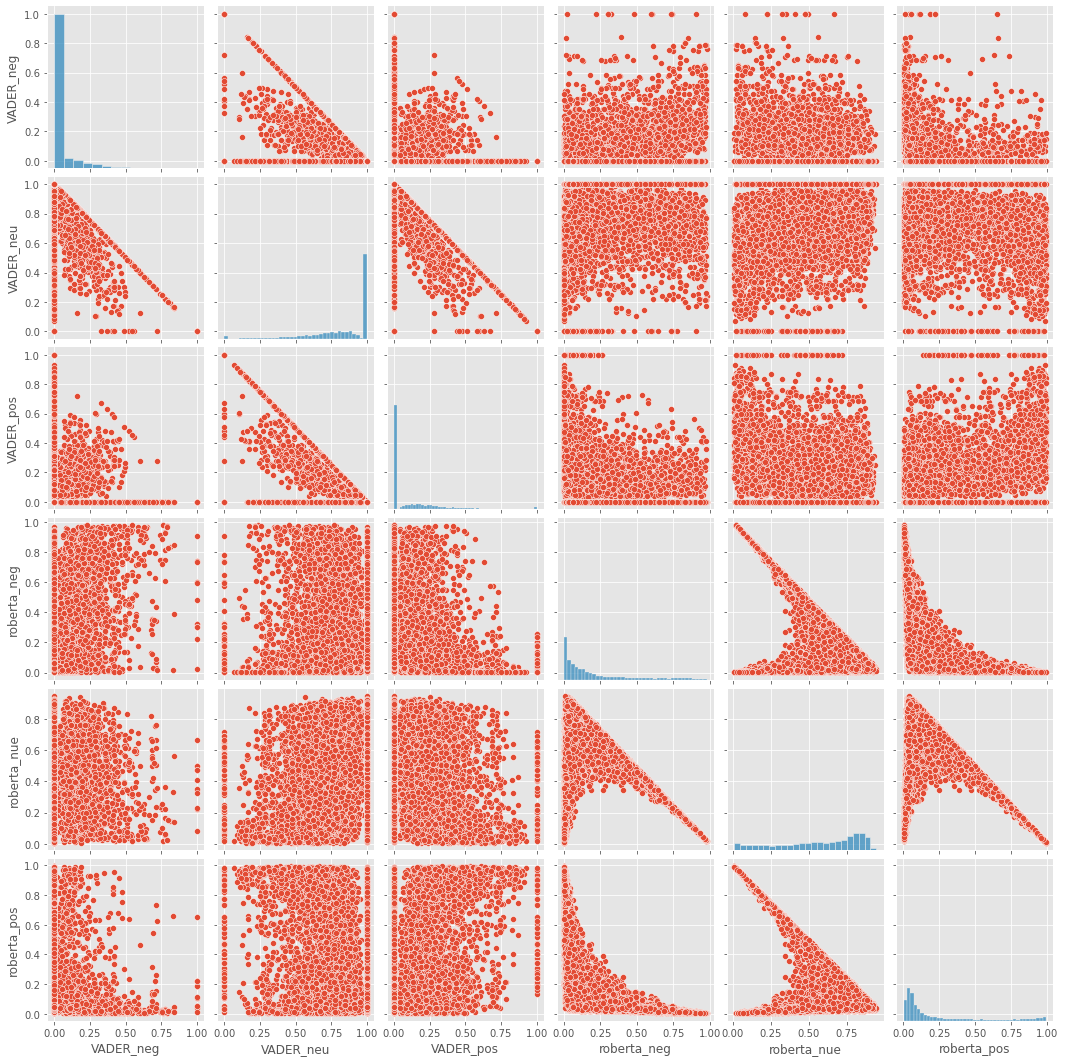

In [303]:
sns.pairplot(data=results_df,
            vars=['VADER_neg', 'VADER_neu', 'VADER_pos', 'roberta_neg', 'roberta_nue','roberta_pos'],
            #hue = '',
            palette='tab10')
plt.show()

# Gender Analysis based on text - using Tweeted Data  
#### Use twitter dataset with labeled genders

[link to kaggle for twitter data](https://www.kaggle.com/code/darkknight98/tweet-analysis-gender-classification)

In [32]:
tweet_df = pd.read_csv('tweet_data.csv',encoding='ISO-8859-1')
tweet_df.shape

(20050, 26)

In [33]:
col=["profileimage","tweet_location","user_timezone","sidebar_color","tweet_coord","link_color","fav_number","tweet_id","_last_judgment_at","created","tweet_created"]
tweet_df.drop(col,axis=1,inplace=True)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
#checking for null values across columns
df.isnull().sum()

Id                0
Channel           0
messageId         0
time              0
user              0
message           0
Purpose           0
Category          0
Subcategory      36
Unnamed: 8     9999
dtype: int64

In [36]:
c=["gender","gender:confidence"]
tweet_df.dropna(subset=c,how="any",inplace=True)

In [37]:
tweet_df["text"].fillna("", inplace=True) #replace null values with "" in text column
tweet_df["description"].fillna("",inplace=True) #replace null values with "" in description column

In [38]:
#Removing the special characters and hyperlinks in text column using Regular Expressions 
o=list(tweet_df["text"])
import re

l=[]
k=[]
for s in tweet_df["text"] :
    a=re.sub(r"http://t.co/[a-zA-Z0-9]*"," ",str(s))
    b=re.sub(r"https://t.co/[a-zA-Z0-9]*"," ",str(s))
    
    l.append(a)
    k.append(b)
    
tweet_df.replace(inplace=True, to_replace=o, value=l)
o=list(tweet_df["text"])
tweet_df.replace(inplace=True, to_replace=o, value=k)
    
tweet_df["text"].replace(regex=True, inplace=True, to_replace=r'[,!.; -@!%^&*)(]', value=' ')

In [39]:
tweet_df.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
description               object
gender_gold               object
name                      object
profile_yn_gold           object
retweet_count              int64
text                      object
tweet_count                int64
dtype: object

In [40]:
#create a new df where we drop all non 100% gender confidence  
tweet_df2 = tweet_df.drop(tweet_df[tweet_df['gender:confidence'] < 1].index)
tweet_df2['gender:confidence'] = tweet_df2['gender:confidence'].astype(int)
tweet_df2['gender:confidence'].nunique() #check we only have 1 left
tweet_df2 = tweet_df2[(tweet_df2['gender'] != 'brand') & (tweet_df2['gender'] != 'unknown')] #drop brand/unknown from gender

In [41]:
tweet_df2.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', 'gender',
       'gender:confidence', 'profile_yn', 'profile_yn:confidence',
       'description', 'gender_gold', 'name', 'profile_yn_gold',
       'retweet_count', 'text', 'tweet_count'],
      dtype='object')

In [42]:
#reduce further to just gender, description, and text
#recall we are 100% confident of the genders
col=['_unit_id', '_golden', 'description','_unit_state', '_trusted_judgments',
       'gender:confidence', 'profile_yn', 'profile_yn:confidence',
    'gender_gold', 'name', 'profile_yn_gold',
       'retweet_count', 'tweet_count']
tweet_df2.drop(col,axis=1,inplace=True)
tweet_df2

,gender,text
0,male,Robbie E Responds To Critics After Win Against...
1,male,ÛÏIt felt like they were my friends and I was...
3,male,Hi JordanSpieth Looking at the url do you...
4,female,Watching Neighbours on Sky catching up with t...
5,female,Ive seen people on the train with lamps chair...
...,...,...
20044,female,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...
20045,female,lookupondeath Fine and I ll drink tea too...
20046,male,Greg Hardy you a good player and all but don t...
20047,male,You can miss people and still never want to se...


In [43]:
tweet_df2['gender'].unique()

array(['male', 'female'], dtype=object)

# Training a model with the tweet data

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [291]:
# Step 1: Prepare the data
X = tweet_df2['text']  # Input features (text)
y = tweet_df2['gender']  # Target variable (gender)

new_df = results_df  # DataFrame where you want to make predictions


In [292]:
# Step 2: Train a machine learning model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_val_transformed = vectorizer.transform(X_val)

model = LogisticRegression()
model.fit(X_train_transformed, y_train)

LogisticRegression()

In [293]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict labels on the validation set
y_pred = model.predict(X_val_transformed)

# Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_val, y_pred, pos_label='female')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_val, y_pred, pos_label='female')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_val, y_pred, pos_label='female')
print("Recall:", recall)



Accuracy: 0.6197604790419161
F1 Score: 0.6613333333333333
Precision: 0.6331914893617021
Recall: 0.6920930232558139


# Use the model to predict gender

In [294]:
# Step 3: Predict gender on the new DataFrame
new_text_transformed = vectorizer.transform(new_df['message'])
new_df['predicted_gender'] = model.predict(new_text_transformed)


In [295]:
new_df['predicted_gender'].unique()

array(['male', 'female'], dtype=object)

In [296]:
new_df.columns

Index(['Id', 'VADER_neg', 'VADER_neu', 'VADER_pos', 'VADER_compound',
       'roberta_neg', 'roberta_nue', 'roberta_pos', 'Channel', 'messageId',
       'time', 'user', 'message', 'Purpose', 'Category', 'Subcategory',
       'predicted_gender'],
      dtype='object')

In [287]:
new_df

,Id,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos,Channel,messageId,time,user,message,Purpose,Category,Subcategory,predicted_gender
0,0,0.162,0.838,0.000,-0.4019,0.311218,0.552902,0.135880,Cucumber,5551fd48f853e7f14c2b7b3c,2015-05-12T13:16:56.794Z,amit007,"Hi Team, I just recently upgraded our cucumber-jvm version ever since then I am getting following error",Team Wide,Dev-Ops,Development Operation Notifications,male
1,1,0.000,1.000,0.000,0.0000,0.466927,0.478378,0.054695,Cucumber,5551fd4a00ed57993752bbb5,2015-05-12T13:16:58.574Z,amit007,Exception in thread \main\ java.lang.NoSuchMethodError: cucumber.runtime.Glue.removeScenarioScopedGlue()V\n\tat cucumber.runtime.java.JavaBackend.buildWorld(JavaBackend.java:131),Team Wide,Dev-Ops,Development Operation Notifications,male
2,2,0.000,0.762,0.238,0.3612,0.281174,0.679980,0.038846,Cucumber,5551feedf853e7f14c2b7b62,2015-05-12T13:23:57.768Z,aslakhellesoy,@amit007 looks like you have inconsistent cucumber-* jar versions,Team Wide,Communication,Communication with Teammates,female
3,3,0.000,0.691,0.309,0.4824,0.037117,0.775123,0.187759,Cucumber,5552032a1817239c37e4e01b,2015-05-12T13:42:02.416Z,LiohAu,So github is trying to replace irc :P,Team Wide,Communication,Communication with Teammates,female
4,4,0.000,0.769,0.231,0.6597,0.004407,0.126503,0.869090,Cucumber,55520e5900ed57993752be4e,2015-05-12T14:29:45.058Z,amit007,"@aslakhellesoy Thanks , seems like I was using older version of cucumber-core , updated the maven with specific version and things started working",Team Wide,Communication,Communication with Teammates,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9994,0.000,0.777,0.223,0.3182,0.023919,0.885351,0.090730,Xenko,5b6b73ed5ec2bc174fd172bd,2018-08-08T22:51:25.350Z,jayrulez,Hello @Kryptos-FR can you take a look here please: https://github.com/xenko3d/xenko/issues/82 ?,Team Wide,Team Collaboration,File and Code Sharing,female
9989,9995,0.000,0.556,0.444,0.1027,0.442963,0.496985,0.060052,Xenko,5b6b748b49932d4fe4b69a39,2018-08-08T22:54:03.199Z,jayrulez,I want to prevent this here:,Team Wide,Communication,Communication with teammates,female
9990,9996,0.000,1.000,0.000,0.0000,0.146377,0.811090,0.042533,Xenko,5b6b7491a6af14730b0c4fa0,2018-08-08T22:54:09.430Z,jayrulez,[![image.png](https://files.gitter.im/xenko3d/xenko/GOJM/thumb/image.png)](https://files.gitter.im/xenko3d/xenko/GOJM/image.png),Team Wide,Team Collaboration,File and Code Sharing,male
9991,9997,0.000,0.781,0.219,0.4215,0.027472,0.226628,0.745900,Xenko,5b6b7583b983453ffbfc81f9,2018-08-08T22:58:11.414Z,Toriadus,"@Kryptos-FR Nice, that means someone is really waiting for the update",Team Wide,Communication,Communication with teammates,male


## Update the df so users only have their most listed gender

In [298]:
# Count the occurrences of each gender for each user
user_gender_counts = new_df.groupby('user')['predicted_gender'].value_counts().unstack(fill_value=0)

# Update the gender column based on the majority gender
new_df['predicted_gender'] = new_df['user'].map(lambda user: user_gender_counts.loc[user].idxmax() if user in user_gender_counts.index else np.nan)


In [299]:
# Find users listed multiple times with conflicting genders (hopefully returns none)
conflicting_users = new_df[new_df.duplicated('user', keep=False)]
conflicting_users = conflicting_users.groupby('user').filter(lambda x: len(x['predicted_gender'].unique()) > 1)
len(conflicting_users)

0

In [300]:
#reorder
desired_order = ['Id', 'Channel', 'predicted_gender','VADER_neg', 'VADER_neu', 'VADER_pos', 'VADER_compound',
       'roberta_neg', 'roberta_nue', 'roberta_pos', 'message', 'messageId',
       'time', 'user', 'Purpose', 'Category', 'Subcategory']

new_df = new_df[desired_order]
new_df

,Id,Channel,predicted_gender,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos,message,messageId,time,user,Purpose,Category,Subcategory
0,0,Cucumber,male,0.162,0.838,0.000,-0.4019,0.311218,0.552902,0.135880,"Hi Team, I just recently upgraded our cucumber-jvm version ever since then I am getting following error",5551fd48f853e7f14c2b7b3c,2015-05-12T13:16:56.794Z,amit007,Team Wide,Dev-Ops,Development Operation Notifications
1,1,Cucumber,male,0.000,1.000,0.000,0.0000,0.466927,0.478378,0.054695,Exception in thread \main\ java.lang.NoSuchMethodError: cucumber.runtime.Glue.removeScenarioScopedGlue()V\n\tat cucumber.runtime.java.JavaBackend.buildWorld(JavaBackend.java:131),5551fd4a00ed57993752bbb5,2015-05-12T13:16:58.574Z,amit007,Team Wide,Dev-Ops,Development Operation Notifications
2,2,Cucumber,male,0.000,0.762,0.238,0.3612,0.281174,0.679980,0.038846,@amit007 looks like you have inconsistent cucumber-* jar versions,5551feedf853e7f14c2b7b62,2015-05-12T13:23:57.768Z,aslakhellesoy,Team Wide,Communication,Communication with Teammates
3,3,Cucumber,male,0.000,0.691,0.309,0.4824,0.037117,0.775123,0.187759,So github is trying to replace irc :P,5552032a1817239c37e4e01b,2015-05-12T13:42:02.416Z,LiohAu,Team Wide,Communication,Communication with Teammates
4,4,Cucumber,male,0.000,0.769,0.231,0.6597,0.004407,0.126503,0.869090,"@aslakhellesoy Thanks , seems like I was using older version of cucumber-core , updated the maven with specific version and things started working",55520e5900ed57993752be4e,2015-05-12T14:29:45.058Z,amit007,Team Wide,Communication,Communication with Teammates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9994,Xenko,male,0.000,0.777,0.223,0.3182,0.023919,0.885351,0.090730,Hello @Kryptos-FR can you take a look here please: https://github.com/xenko3d/xenko/issues/82 ?,5b6b73ed5ec2bc174fd172bd,2018-08-08T22:51:25.350Z,jayrulez,Team Wide,Team Collaboration,File and Code Sharing
9989,9995,Xenko,male,0.000,0.556,0.444,0.1027,0.442963,0.496985,0.060052,I want to prevent this here:,5b6b748b49932d4fe4b69a39,2018-08-08T22:54:03.199Z,jayrulez,Team Wide,Communication,Communication with teammates
9990,9996,Xenko,male,0.000,1.000,0.000,0.0000,0.146377,0.811090,0.042533,[![image.png](https://files.gitter.im/xenko3d/xenko/GOJM/thumb/image.png)](https://files.gitter.im/xenko3d/xenko/GOJM/image.png),5b6b7491a6af14730b0c4fa0,2018-08-08T22:54:09.430Z,jayrulez,Team Wide,Team Collaboration,File and Code Sharing
9991,9997,Xenko,male,0.000,0.781,0.219,0.4215,0.027472,0.226628,0.745900,"@Kryptos-FR Nice, that means someone is really waiting for the update",5b6b7583b983453ffbfc81f9,2018-08-08T22:58:11.414Z,Toriadus,Team Wide,Communication,Communication with teammates


# Questions

#### 1. How does the sentiment of messages differ between male and female authors in the GitterCom Dataset?
#### 2a. Is the conversation on GitterCom friendly, rude, or neutral?
#### 2b. Are there any notable difference in the sentiment across different companies in the GitterCom Dataset?

## Male vs Female

In [304]:
gender_group = new_df.drop('Id',axis=1).groupby('predicted_gender')
gender_group.mean()#['VADER_compound']

,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos
predicted_gender,,,,,,,
female,0.038182,0.831055,0.130751,0.174942,0.235634,0.540767,0.223598
male,0.044909,0.824328,0.130125,0.128690,0.205478,0.563343,0.231180


In [305]:
avg_difference = gender_group.mean().T['male'] - gender_group.mean().T['female']
avg_difference 
#note: nothing significant
#note:both male/female are ~.15 compound which implies slight positive chat vibe
#but negative scores are not necessarily 'rude'. they could just be users having trouble and asking for help.

VADER_neg         0.006727
VADER_neu        -0.006726
VADER_pos        -0.000626
VADER_compound   -0.046252
roberta_neg      -0.030157
roberta_nue       0.022576
roberta_pos       0.007581
dtype: float64

In [306]:
#Count male/female by messages sent; users can be repeated and counted multiple times
new_df['predicted_gender'].value_counts()

male      9427
female     566
Name: predicted_gender, dtype: int64

In [307]:
# Count the number of each gender where each user is represented once
unique_users = new_df.drop_duplicates('user')
gender_counts = unique_users['predicted_gender'].value_counts()
gender_counts

male      203
female    109
Name: predicted_gender, dtype: int64

## Channel


In [176]:
# Set the maximum column width to unlimited
pd.set_option('display.max_colwidth', None)

# Reset the maximum column width to default
#pd.reset_option('display.max_colwidth')

In [308]:
grouped = new_df.drop('Id',axis=1).groupby('Channel')
grouped.mean()

,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos
Channel,,,,,,,
Cucumber,0.041585,0.851137,0.105265,0.105734,0.221641,0.589596,0.188764
Freezing Moon - Ancient Beast,0.059738,0.757865,0.181390,0.217197,0.214967,0.486254,0.298780
ImageJ,0.036886,0.835422,0.127698,0.141295,0.186570,0.570193,0.243237
JSPM,0.034822,0.852414,0.110763,0.115667,0.198106,0.610663,0.191232
Jhipster,0.054915,0.819498,0.125582,0.107829,0.221580,0.542343,0.236076
MarionetteJS,0.048661,0.820845,0.130498,0.079816,0.215835,0.573717,0.210448
SciKit-Learn,0.040142,0.835574,0.124284,0.144301,0.190828,0.560277,0.248895
TheHolyWaffle,0.038615,0.838539,0.122844,0.123669,0.225289,0.574492,0.200218
UIKit,0.051567,0.824489,0.122943,0.101477,0.215124,0.566647,0.218230


In [310]:
# the highest average roberta_pos
grouped.mean().sort_values('roberta_pos',ascending=False)

,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos
Channel,,,,,,,
Freezing Moon - Ancient Beast,0.059738,0.757865,0.181390,0.217197,0.214967,0.486254,0.298780
Xenko,0.038325,0.811434,0.150240,0.176032,0.181905,0.546599,0.271496
SciKit-Learn,0.040142,0.835574,0.124284,0.144301,0.190828,0.560277,0.248895
ImageJ,0.036886,0.835422,0.127698,0.141295,0.186570,0.570193,0.243237
Jhipster,0.054915,0.819498,0.125582,0.107829,0.221580,0.542343,0.236076
UIKit,0.051567,0.824489,0.122943,0.101477,0.215124,0.566647,0.218230
MarionetteJS,0.048661,0.820845,0.130498,0.079816,0.215835,0.573717,0.210448
TheHolyWaffle,0.038615,0.838539,0.122844,0.123669,0.225289,0.574492,0.200218
JSPM,0.034822,0.852414,0.110763,0.115667,0.198106,0.610663,0.191232


In [211]:
# the highest average roberta_neu
grouped.mean().sort_values('roberta_nue',ascending=False)

,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos
Channel,,,,,,,
JSPM,0.034822,0.852414,0.110763,0.115667,0.198106,0.610663,0.191232
Cucumber,0.041585,0.851137,0.105265,0.105734,0.221641,0.589596,0.188764
TheHolyWaffle,0.038615,0.838539,0.122844,0.123669,0.225289,0.574492,0.200218
MarionetteJS,0.048661,0.820845,0.130498,0.079816,0.215835,0.573717,0.210448
ImageJ,0.036886,0.835422,0.127698,0.141295,0.186570,0.570193,0.243237
UIKit,0.051567,0.824489,0.122943,0.101477,0.215124,0.566647,0.218230
SciKit-Learn,0.040142,0.835574,0.124284,0.144301,0.190828,0.560277,0.248895
Xenko,0.038325,0.811434,0.150240,0.176032,0.181905,0.546599,0.271496
Jhipster,0.054915,0.819498,0.125582,0.107829,0.221580,0.542343,0.236076


In [212]:
# the highest average roberta_neg
grouped.mean().sort_values('roberta_neg',ascending=False)

,VADER_neg,VADER_neu,VADER_pos,VADER_compound,roberta_neg,roberta_nue,roberta_pos
Channel,,,,,,,
TheHolyWaffle,0.038615,0.838539,0.122844,0.123669,0.225289,0.574492,0.200218
Cucumber,0.041585,0.851137,0.105265,0.105734,0.221641,0.589596,0.188764
Jhipster,0.054915,0.819498,0.125582,0.107829,0.221580,0.542343,0.236076
MarionetteJS,0.048661,0.820845,0.130498,0.079816,0.215835,0.573717,0.210448
UIKit,0.051567,0.824489,0.122943,0.101477,0.215124,0.566647,0.218230
Freezing Moon - Ancient Beast,0.059738,0.757865,0.181390,0.217197,0.214967,0.486254,0.298780
JSPM,0.034822,0.852414,0.110763,0.115667,0.198106,0.610663,0.191232
SciKit-Learn,0.040142,0.835574,0.124284,0.144301,0.190828,0.560277,0.248895
ImageJ,0.036886,0.835422,0.127698,0.141295,0.186570,0.570193,0.243237


In [315]:
new_df.drop('Id',axis=1).mean()

VADER_neg         0.044528
VADER_neu         0.824709
VADER_pos         0.130161
VADER_compound    0.131310
roberta_neg       0.207186
roberta_nue       0.562064
roberta_pos       0.230750
dtype: float64

# Extra

In [217]:
#find the message in a specified channel with specified max value field
thequery = new_df.query("Channel=='Cucumber'")
x=str(thequery['VADER_compound'].max())
thequery.query("VADER_compound ==" + x)['message']
#here is the highest VADER_compound scored message in the Cucumber channel

634    Not tried yet but it could help yes, thanks for the idea @priyankshah217 \nUIAutomator looks great, but I cannot run automation tests on devices when API < 18, even for the tests that doesn't need UIAutomator. In fact Cucumber runner try to load the class that is not present on the API, and the only solutions I see right now is to manipulate bytecode, use reflection to proxify the v18 classes, or simply drop tests on older devices... any of this doesn't look right :/\nIf you have any idea on how to fix that, it could be awesome for me.
Name: message, dtype: object

In [220]:
thequery = new_df.query("Channel=='Cucumber'")
x=str(thequery['roberta_pos'].max())
thequery.query("roberta_pos ==" + x)['message']
#here is the highest roberta_pos scored message in the Cucumber channel

873     Nice, that was a good find\ud83d\udc4d\ud83c\udffc
Name: message, dtype: object

In [218]:
#find the message in a specified channel with specified max value field
thequery = new_df.query("Channel=='Cucumber'")
x=str(thequery['roberta_neg'].max())
thequery.query("roberta_neg ==" + x)['message']
#here is the highest roberta_neg scored message in the Cucumber channel
#i.e. this is the channel with the highest roberta_neg on average, and this is the most roberta_neg message

113    constantly seeing red is annoying :(
Name: message, dtype: object

In [202]:
#query using str.contains method on the message column
new_df.query("message.str.contains('suggestion is really good if you need to do something')")['message']
#returns the entire message containing that text; remove ['message'] above to get the row from the df

178    zsolt fabok's suggestion is really good if you need to do something at the end of suite
Name: message, dtype: object

In [47]:
#find the NaN in a column
query_string = 'message' + '.isna()'
df.query(query_string)

,Channel,messageId,time,user,message,Purpose,Category,Subcategory,Unnamed: 8
747,Cucumber,576c2583c7061d590d53b8a6,2016-06-23T18:08:03.864Z,KharanKnight,NaN,Team Wide,Customer support,How-to,NaN
